In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
#load in csv
pyber_ride_df = pd.read_csv('Resources/PyBer_ride_data.csv')
pyber_ride_df

,Month,Avg. Fare ($USD)
0,Jan,10.02
1,Feb,23.24
2,Mar,39.20
3,April,35.42
4,May,32.34
5,June,27.04
6,July,43.82
7,Aug,10.56
8,Sept,11.85
9,Oct,27.90


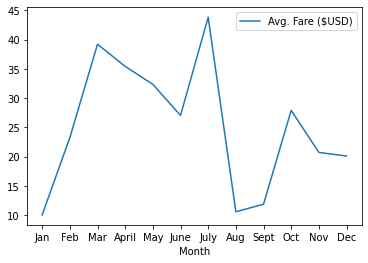

In [3]:
# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]

# Plot the data.
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()

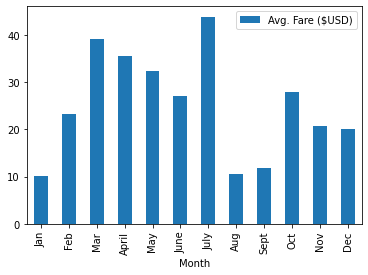

In [4]:
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)", kind='bar')
plt.show()

In [5]:
# read the city data file and store it in a DataFrame
city_data_df = pd.read_csv('Resources/city_data.csv')
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [6]:
# read the ride data file and store it in a DataFrame
ride_data_df = pd.read_csv('Resources/ride_data.csv')
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
city_data_df['type'].value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [11]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how='left', on=['city','city'])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
suburban_cities_df = pyber_data_df[pyber_data_df['type']=='Suburban']
rural_cities_df = pyber_data_df[pyber_data_df['type']=='Rural']

In [17]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [20]:
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [21]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [22]:
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [23]:
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [24]:
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

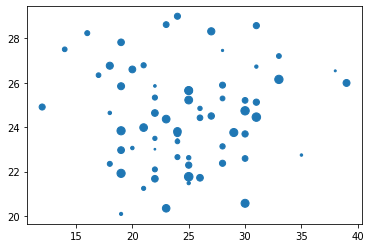

In [25]:
plt.scatter(urban_ride_count,urban_avg_fare,s=urban_driver_count)

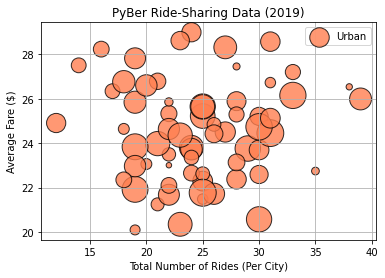

In [26]:
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='k',linewidth=1,
           alpha=0.8, label='Urban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

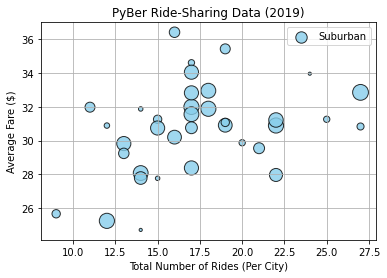

In [27]:
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,c='skyblue',
           edgecolor = 'k',linewidth=1,
           alpha=0.8,label='Suburban')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

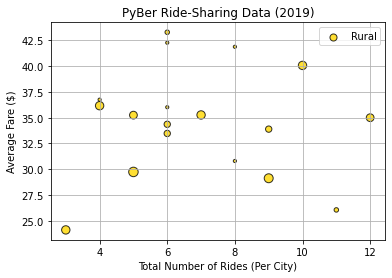

In [28]:
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c= 'gold',
           edgecolor='k',linewidth=1,
           alpha=0.8,label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

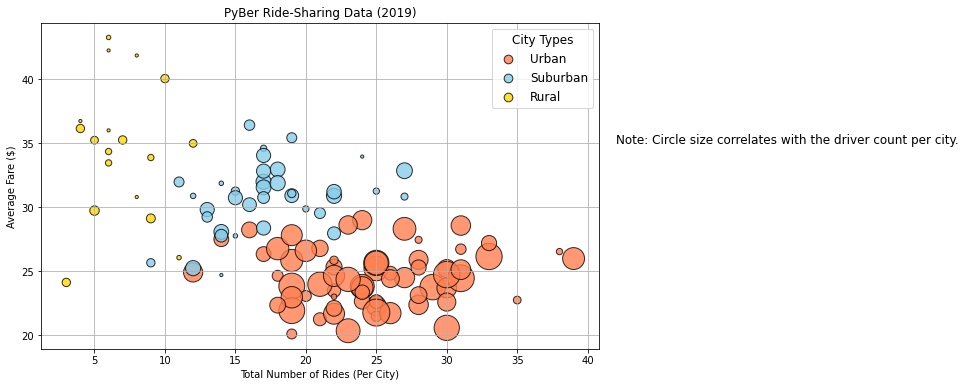

In [29]:
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, c='coral',
           edgecolor='k',linewidth=1,
           alpha=0.8, label='Urban')

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count,c='skyblue',
           edgecolor = 'k',linewidth=1,
           alpha=0.8,label='Suburban')

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c= 'gold',
           edgecolor='k',linewidth=1,
           alpha=0.8,label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)

lgnd = plt.legend(fontsize='12',mode='Expanded',
                 scatterpoints=1,loc='best',title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

plt.text(42,35, 'Note: Circle size correlates with the driver count per city.', fontsize=12)

plt.savefig('analysis_Fig1.png')
plt.show()

In [30]:
# Get summary statistics.
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [32]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [33]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [34]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [35]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [36]:
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round (rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [37]:
urban_ride_count.median()

24.0

In [38]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [39]:
suburban_ride_count.mode()

0    17
dtype: int64

In [40]:
import numpy as np
import scipy.stats as sts

In [41]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [42]:
sts.mode(suburban_ride_count)

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [43]:
sts.mode(rural_ride_count)

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [66]:
urban_fares = urban_cities_df['fare']
suburban_fares = suburban_cities_df['fare']
rural_fares = rural_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [67]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [68]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']

mean_urban_drivers = np.mean(urban_drivers)
mean_suburban_drivers = np.mean(suburban_drivers)
mean_rural_drivers = np.mean(rural_drivers)

print(f"The mean number of drivers in urban cities is: {round(mean_urban_drivers)}.")
print(f"The mean number of drivers in suburban cities is: {round(mean_suburban_drivers)}.")
print(f"The mean number of drivers in rural cities is: {round(mean_rural_drivers)}.")

The mean number of drivers in urban cities is: 37.
The mean number of drivers in suburban cities is: 14.
The mean number of drivers in rural cities is: 4.


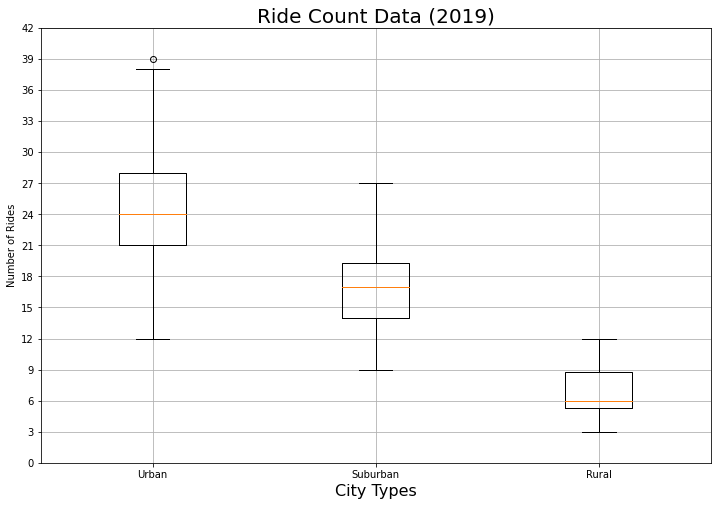

In [69]:
x_labels = ['Urban','Suburban','Rural']
fig,ax = plt.subplots(figsize=(12,8))
ax.boxplot([urban_ride_count,suburban_ride_count,rural_ride_count],labels=x_labels)

ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_xlabel('City Types',fontsize=16)
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0,45,3))
ax.grid()
plt.savefig('analysis_Fig2.png')
plt.show()

In [70]:
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


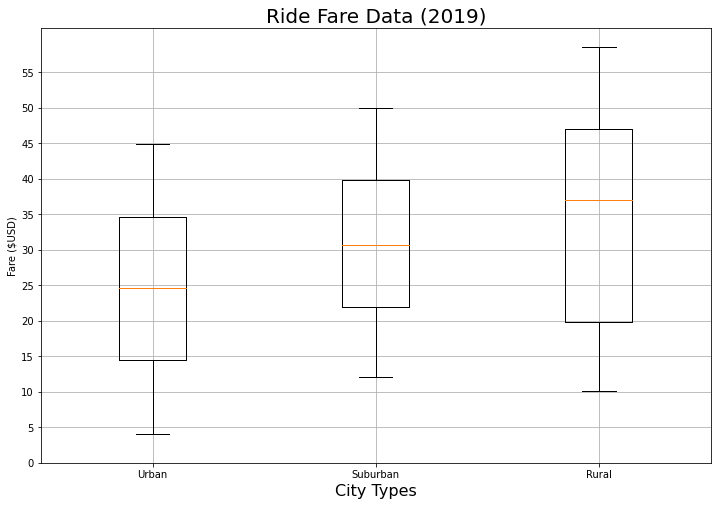

In [75]:
x_labels = ['Urban','Suburban','Rural']
fig,ax = plt.subplots(figsize=(12,8))
ax.boxplot([urban_fares,suburban_fares,rural_fares],labels=x_labels)

ax.set_title('Ride Fare Data (2019)',fontsize=20)
ax.set_ylabel('Fare ($USD)')
ax.set_xlabel('City Types', fontsize=16)
ax.set_yticks(np.arange(0,60,5))
ax.grid()
plt.savefig('analysis_Fig3.png')
plt.show()

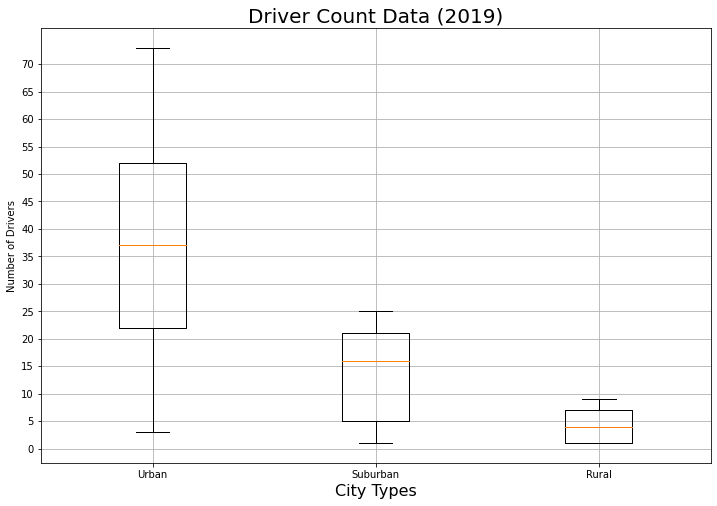

In [78]:
x_labels = ['Urban','Suburban','Rural']
fig,ax = plt.subplots(figsize=(12,8))
ax.boxplot([urban_drivers,suburban_drivers,rural_drivers],labels=x_labels)

ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers')
ax.set_xlabel('City Types',fontsize=16)
ax.set_yticks(np.arange(0,75,5))
ax.grid()
plt.savefig('analysis_Fig4.png')
plt.show()


In [81]:
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [83]:
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [84]:
type_percents = sum_fares_by_type/total_fares *100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

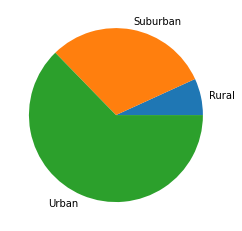

In [85]:
plt.pie(type_percents,labels=['Rural','Suburban','Urban'])
plt.show()

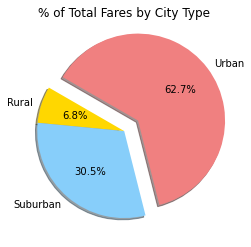

In [90]:
plt.pie(type_percents,
       labels=['Rural','Suburban','Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.2],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
plt.show()

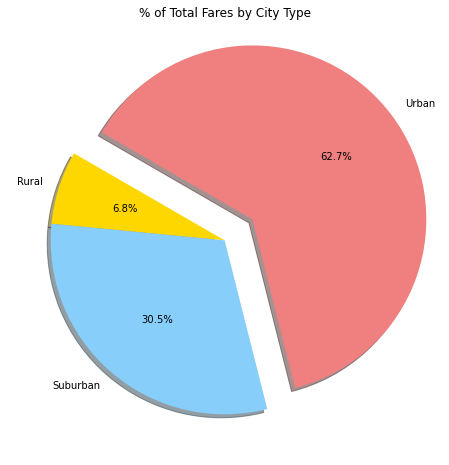

In [91]:
import matplotlib as mpl

plt.subplots(figsize=(12,8))
plt.pie(type_percents,
       labels=['Rural','Suburban','Urban'],
       colors=['gold','lightskyblue','lightcoral'],
       explode=[0,0,0.2],
       autopct='%1.1f%%',
       shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size']=14
plt.savefig('analysis_Fig5.png')
plt.show()